シクロヘキサンの反転を量子化学計算し、安定なコンフォーマーと遷移状態を求める。    中田真秀

シクロヘキサンの反転を量子化学計算し、安定なコンフォーマーと遷移状態を求めるのがこのjupyter notebookの主題である。
教科書通り、イス型 (chair) 、半イス型 (half-chair) 、ボート型 (boat) 、ひずみボート型 (twist-boat) が得られた。
量子化学計算はGrimmeのGF2-xTB、コンフォーマーを求めるのはGrimmeらのcrest、遷移状態を求めるためにはZimmermanらのmoleculer GSMを用いた。

ただ、教科書通りというのには<a href="https://pubs.acs.org/doi/pdf/10.1021/ed074p813">A Three-Dimensional Energy Surface for the Conformational Inversion of Cyclohexane</a>でも指摘されているように語弊がある。実際はボート型を経由しなくともシクロヘキサンの反転は行える。従って二通りの反転がある。一つ目は、ボート型を経由せず、歪みボート型から直接反転する反転。二つ目は、歪みボート型からボート型を経由する反転である。では、ボート型を経由した反転はそれを経由しない反転とどう違うのだろうか。その答えは、シクロヘキサンが炭素骨格が全体的に捩じれ反転する、である。一つの炭素のエカトリアルとアキシアル位の水素が反転する、ではない。<a href="https://www.youtube.com/watch?v=eDvqn65F5r4">例えば、この動画はよくある解説なのであるが、明確に間違っている</a>。もしとるとすると遷移状態は正六角型を経ることになる。動画の説明では一つの炭素のみが動くことになっているが、これは非常にエネルギーとしては高い状態になるはずだ。正解は、炭素骨格はそのねじりを利用しつつコンフォームを変更する、である。おそらく水素原子のエカトリアルとアキシアル位の"移動"にかかるエネルギーを最小にするためであろう。そして、このボート型へのエネルギー障壁は1～2kcal/molと小さいので、ボート型を経由する、しない、どちらの反転も通常起こっている。

歪みボート型の60度のねじりは鏡像反転とも関連付けられる。お互いはお互いの鏡像関係にある。ただし原子の順番が違っている。

ぜひ、ノートの再現に必要なファイルたちダウンロードして手元の環境で実行して、コンフォーマーの形および安定構造間の構造変化アニメーションを見ていただきたい。残念ながらgithubでは分子を一切見ることができなかった。

簡易再現
<pre>
$ pip3 pip install jupyter_jsmol
$ https://github.com/nakatamaho/quantumchemistry_notebook.git
$ cd cyclohexane
</pre>
このチェックアウトにあるcyclohexane.ipynbをjupyter-notebookで閲覧すればよい。"!"が先頭に来ているshell scriptのところ以外を適宜実行すると、例えば、In[2]を実行してみると分子を見ることができる。マウスで動かすことも可能である。

推奨環境
<ul>
    <li> Linux Centos 7
    <li> Docker on Windows/Mac/Linux
</ul>

必要なソフト
<ul>
    <li>  <a href="https://github.com/grimme-lab/xtb">xtb semiemprical tight binding DFT</a>    
    <li> <a href="https://github.com/grimme-lab/crest">crest (linux binaryのみ)</a>    
    <li> <a href="https://github.com/ZimmermanGroup/molecularGSM">code for single-ended and double-ended molecular GSM </a>
    <li> <a href="http://openbabel.org/wiki/Main_Page">Open Babel</a>
    <li> <a href="https://pymol.org/2/">pymol</a> (ボート型の遷移状態を求めるために必要)
    <li> <a href="https://github.com/charnley/rmsd">Calculate Root-mean-square deviation (RMSD) of Two Molecules Using Rotation</a>
    <li> <a href="https://software.intel.com/content/www/us/en/develop/tools/math-kernel-library.html">Intel MKL</a>
    <li> <a href="https://software.intel.com/content/www/us/en/develop/articles/redistributable-libraries-for-intel-c-and-fortran-2020-compilers-for-linux.html"> Redistributable Libraries for Intel® C++ and Fortran 2020 Compilers for Linux* </a>
</ul>

参考文献
<ul>
<li> <a href="https://en.wikipedia.org/wiki/Cyclohexane_conformation">Cyclohexane conformation</a>
<li> <a href="https://pubs.acs.org/doi/pdf/10.1021/ed074p813">A Three-Dimensional Energy Surface for the Conformational Inversion of Cyclohexane</a>
<li> <a href="https://pubs.acs.org/doi/10.1021/j100377a041">Ab initio conformational analysis of cyclohexane</a>
</ul>


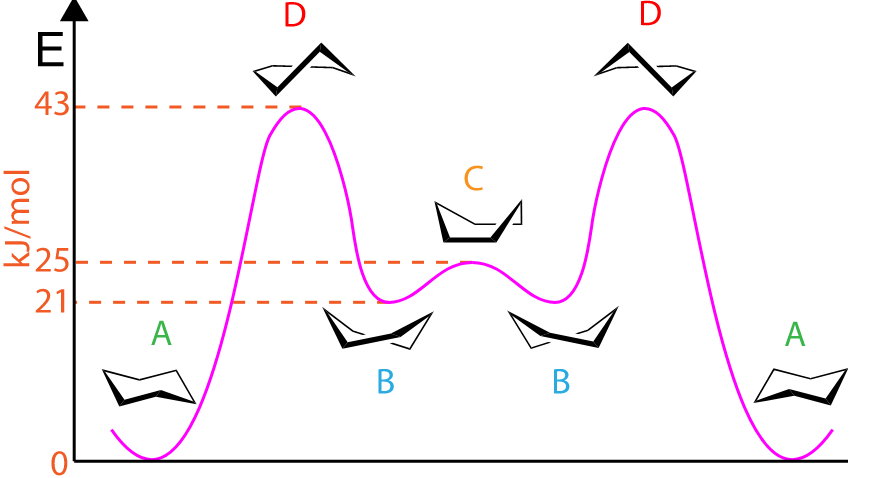

Open Babelでcyclohexaneの三次元構造を生成

In [1]:
!obabel -:"C1CCCCC1" --gen3d -h -o xyz -Ocyclohexane.xyz

1 molecule converted


ここではイス型が得られた。以下でjsmolを使えるようにしておく

In [2]:
from jupyter_jsmol import JsmolView
from ipywidgets import Layout, widgets, interact
view = JsmolView.from_file("cyclohexane.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

xtbで構造最適化する。これは数秒で終わる(Core i7 4790K, CentOS 7 docker, Windows10)

In [3]:
!/usr/bin/time xtb cyclohexane.xyz --opt

      -----------------------------------------------------------      
     |                   =====================                   |     
     |                           x T B                           |     
     |                   =====================                   |     
     |                         S. Grimme                         |     
     |          Mulliken Center for Theoretical Chemistry        |     
     |                    University of Bonn                     |     
      -----------------------------------------------------------      

   * xtb version 6.3.2 (unknown-commit) compiled by '@Linux' on 09/23/2020

   xtb is free software: you can redistribute it and/or modify it under
   the terms of the GNU Lesser General Public License as published by
   the Free Software Foundation, either version 3 of the License, or
   (at your option) any later version.
   
   xtb is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; withou


          ...................................................
          :                      SETUP                      :
          :.................................................:
          :   optimization level            normal          :
          :   max. optcycles                   200          :
          :   ANC micro-cycles                  20          :
          :   degrees of freedom                48          :
          :.................................................:
          :   RF solver                   davidson          :
          :   write xtbopt.log                true          :
          :   linear?                        false          :
          :   energy convergence         0.5000000E-05 Eh   :
          :   grad. convergence          0.1000000E-02 Eh/α :
          :   maximium RF displ.         1.0000000          :
          :   Hlow (freq-cutoff)         0.1000000E-01      :
          :   Hmax (freq-cutoff)         5.0000000          :
       


 iter      E             dE          RMSdq      gap      omega  full diag
   1    -19.2676489 -0.192676E+02  0.169E-05   13.66       0.0  T
   2    -19.2676489 -0.182965E-11  0.757E-06   13.66    3115.2  T
   3    -19.2676489 -0.106581E-12  0.412E-06   13.66    5724.3  T

   *** convergence criteria satisfied after 3 iterations ***

         #    Occupation            Energy/Eh            Energy/eV
      -------------------------------------------------------------
         1        2.0000           -0.6290436             -17.1171
       ...           ...                  ...                  ...
        12        2.0000           -0.4614201             -12.5559
        13        2.0000           -0.4614130             -12.5557
        14        2.0000           -0.4340125             -11.8101
        15        2.0000           -0.4340108             -11.8100
        16        2.0000           -0.4167635             -11.3407
        17        2.0000           -0.4091714             -1


molecular dipole:
                 x           y           z       tot (Debye)
 q only:       -0.000       0.000      -0.000
   full:       -0.000       0.000       0.000       0.000
molecular quadrupole (traceless):
                xx          xy          yy          xz          yz          zz
 q only:       -0.003      -0.000      -0.003       0.000      -0.000       0.006
  q+dip:       -0.790      -0.000      -0.791       0.009      -0.004       1.582
   full:       -0.412      -0.000      -0.412       0.005      -0.002       0.824

           -------------------------------------------------
          |                Geometry Summary                 |
           -------------------------------------------------

      molecular mass/u    :       84.1597044
   center of mass at/Å    :        0.0004194       0.0007835       0.0019937
  moments of inertia/u·Å² :        0.1157135E+03   0.1157200E+03   0.2013283E+03
rotational constants/cm⁻¹ :        0.1456842E+00   0.1456760E+00   0

In [4]:
!mv xtbopt.xyz cyclohexane.xtbopt.xyz

In [5]:
view = JsmolView.from_file("cyclohexane.xtbopt.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

ここでもイス型が得られた。初期構造がイス型なので当然だと思われる。

crestでコンフォーマーを求める。これは13-15分かかる(Core i7 4790K, CentOS 7 docker, Windows10)

In [6]:
!/usr/bin/time crest cyclohexane.xtbopt.xyz 

 
       |                                            |
       |                 C R E S T                  |
       |                                            |
       |  Conformer-Rotamer Ensemble Sampling Tool  |
       |       based on the GFNn-xTB methods        |
       |             P.Pracht, S.Grimme             |
       |          Universitaet Bonn, MCTC           |
       Version 2.10.2, Tue 9. Jun 13:32:10 CEST 2020
       Using the xTB program.
       Compatible with XTB version 6.1 and later.
 
   Cite work conducted with this code as

   P. Pracht, F. Bohle, S. Grimme, PCCP, 2020, 22, 7169-7192.

   and

   S. Grimme, JCTC, 2019, 15, 2847-2862.
 
   This program is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; without even the implied warranty of
   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

 Command line input:
 > crest cyclohexane.xtbopt.xyz

  # threads =           1
-------------------------
Starting z-matrix sorting
-------

 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277

 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277

639.74user 36.01system 14:47.51elapsed 76%CPU (0avgtext+0avgdata 25824maxresident)k
0inputs+0outputs (0major+13337569minor)pagefaults 0swaps


crestが正常終了すると、コンフォーマーがxyzフォーマットで二つ出てくるため、それを分割しておく。

In [7]:
!python3 splitxyz.py crest_conformers.xyz cyclohexane.crest

output: cyclohexane.crest.0000.xyz 
output: cyclohexane.crest.0001.xyz 


In [8]:
view = JsmolView.from_file("cyclohexane.crest.0000.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

crestでコンフォーマー求めたらイス型と歪みボート型が得られた。これらは(局所)最適構造となっている。

In [9]:
view = JsmolView.from_file("cyclohexane.crest.0001.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [10]:
!cp cyclohexane.crest.0001.xyz cyclohexane.twistboat.xtb.xyz
!cp cyclohexane.crest.0000.xyz cyclohexane.chair.xtb.xyz

イス型と歪みボート型は局所安定構造で、それらをつなぐ遷移状態の半イス型が存在する。これを求めてみよう。
これには、https://xtb-docs.readthedocs.io/en/latest/gsm.html を用いる。gsm_xtb.tgzはGrimme先生からもらう必要がある。が、https://github.com/nakatamaho/quantumchemistry_notebook/tree/master/cyclohexane に置いておいた。このバイナリを走らせるためには、<a href="https://software.intel.com/content/www/us/en/develop/tools/math-kernel-library.html">Intel MKL</a>と<a href="https://software.intel.com/content/www/us/en/develop/articles/redistributable-libraries-for-intel-c-and-fortran-2020-compilers-for-linux.html"> Redistributable Libraries for Intel® C++ and Fortran 2020 Compilers for Linux* </a>が必要となる。

In [11]:
!tar xvfz gsm_xtb.tgz

./
./tm2orca.py
./start.xyz
./.fitpar2
./inpfileq
./scratch/
./scratch/initial0000.xyz
./gsm.orca
./end.xyz
./ograd


In [12]:
!sed -i -e "2d" cyclohexane.chair.xtb.xyz
!sed -i -e "2d" cyclohexane.twistboat.xtb.xyz
!sed -i -e "2i\ " cyclohexane.chair.xtb.xyz
!sed -i -e "2i\ " cyclohexane.twistboat.xtb.xyz
!calculate_rmsd -p cyclohexane.chair.xtb.xyz cyclohexane.twistboat.xtb.xyz > l ; mv l cyclohexane.twistboat.xtb.xyz
!cat cyclohexane.chair.xtb.xyz cyclohexane.twistboat.xtb.xyz > ./scratch/initial0000.xyz
!cat ./scratch/initial0000.xyz
!sed -i 's/^NNODES.*$/NNODES      15/' inpfileq
!cat inpfileq

  18
 
 C         -1.1337218321       -0.8995668574        0.2416799394
 C          0.2122230118       -1.4316165901       -0.2416387401
 C          1.3459974227       -0.5320260923        0.2415704901
 C          1.1337751998        0.8996662876       -0.2416162000
 C         -0.2122522524        1.4315218696        0.2416882495
 C         -1.3460326141        0.5320235518       -0.2417086008
 H         -1.3762018718        0.5439595587       -1.3339265908
 H         -2.3034441279        0.9104343197        0.1233710089
 H         -0.2169612125        1.4635569971        1.3339163595
 H         -0.3632234358        2.4498880837       -0.1233171106
 H          1.1592846750        0.9201222883       -1.3338616200
 H          1.9401783407        1.5395190035        0.1236946601
 H          1.3762803814       -0.5440750983        1.3337599201
 H          2.3033548863       -0.9104182608       -0.1236562095
 H          0.2169228643       -1.4639152177       -1.3338503001
 H          0.3632

GSMで遷移状態を求める。7分程度かかった(Core i7 4790K, CentOS 7 docker, Windows10)

In [13]:
!/usr/bin/time ./gsm.orca

 Number of QC processors: 1 
***** Starting Initialization *****
 runend 1
  -structure filename from input: scratch/initial0000.xyz 
Initializing Tolerances and Parameters... 
  -Opening inpfileq 
  -reading file... 
  -using GSM 
  -RESTART: 0
  -MAX_OPT_ITERS: 200
  -STEP_OPT_ITERS: 30
  -CONV_TOL = 0.0005
  -ADD_NODE_TOL = 0.1
  -SCALING = 1
  -SSM_DQMAX: 0.8
  -SSM_DQMIN: 0.2
  -GROWTH_DIRECTION = 0
  -INT_THRESH: 2
  -SSM_MIN_SPACING: 5
  -BOND_FRAGMENTS = 1
  -INITIAL_OPT: 0
  -FINAL_OPT: 150
  -PRODUCT_LIMIT: 100
  -TS_FINAL_TYPE: 0
  -NNODES = 15
 Done reading inpfileq 

 reading isomers 
 couldn't find ISOMERS file: scratch/ISOMERS0000 
Reading and initializing string coordinates 
  -Opening structure file 
  -reading file... 
  -The number of atoms is: 18
  -Reading the atomic names...  -Reading coordinates...Opening xyz file 
Finished reading information from structure file

****************************************
****************************************
****** Starting IC

 ic1.nbonds: 18 ic2.nbonds: 18 
 saving bond union: 18  saving angle union: 36  saving torsion union: 54  total number of coordinates: 108 


 actual IC's 

 printing internals 
 number of bonds: 18
 bond  1:  2 to  1:  1.53 
 bond  2:  3 to  2:  1.53 
 bond  3:  4 to  3:  1.53 
 bond  4:  5 to  4:  1.53 
 bond  5:  6 to  1:  1.53 
 bond  6:  6 to  5:  1.53 
 bond  7:  7 to  6:  1.09 
 bond  8:  8 to  6:  1.09 
 bond  9:  9 to  5:  1.09 
 bond 10: 10 to  5:  1.09 
 bond 11: 11 to  4:  1.09 
 bond 12: 12 to  4:  1.09 
 bond 13: 13 to  3:  1.09 
 bond 14: 14 to  3:  1.09 
 bond 15: 15 to  2:  1.09 
 bond 16: 16 to  2:  1.09 
 bond 17: 17 to  1:  1.09 
 bond 18: 18 to  1:  1.09 

 number of angles: 36
 angle   1:  3  2  1:  110.5 
 angle   2:  4  3  2:  110.5 
 angle   3:  5  4  3:  110.5 
 angle   4:  6  1  2:  110.5 
 angle   5:  6  5  4:  110.5 
 angle   6:  5  6  1:  110.4 
 angle   7:  7  6  1:  109.3 
 angle   8:  7  6  5:  109.3 
 angle   9:  8  6  1:  109.9 
 angle  10:  8  6  5: 


 growing iter: 3 
 adding node: 3 between 2 12 
 iR,iP: 2 12 iN: 3  dqmag: 1.00 dq0[constraint]: -0.11 
 initial Hint ev: 0.036 0.036 0.037 0.051
 adding node: 11 between 12 3 
 iR,iP: 12 3 iN: 11  dqmag: 1.00 dq0[constraint]: -0.12 
 initial Hint ev: 0.035 0.036 0.038 0.051
 rpart:  0.17 0.17 0.17 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.17 0.17 0.17 0.00
 spacings (end ic_reparam, steps: 4):  0.85 0.79 0.77 2.39 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.39 0.77 0.79 0.86  disprms: 0.094 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal te

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.003 ss: 0.007 (DMAX: 0.100) predE: -0.01  E(M): 0.73 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.005 ss: 0.015 (DMAX: 0.100) predE: -0.02  E(M): 2.28 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.006 ss: 0.015 (DMAX: 0.100) predE: -0.0

 disp[1]: -0.00 disp[2]: 0.00 disp[3]: 0.01 disp[4]: 0.01 disp[5]: 0.01 disp[6]: 0.01 disp[7]: 0.01 disp[8]: -0.01 disp[9]: -0.01 disp[10]: -0.01 disp[11]: -0.00 disp[12]: -0.00 disp[13]: -0.00
 disp[1]: -0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.01 disp[6]: 0.01 disp[7]: 0.01 disp[8]: -0.01 disp[9]: -0.01 disp[10]: -0.00 disp[11]: -0.00 disp[12]: -0.00 disp[13]: -0.00
 spacings (end ic_reparam, steps: 25):  0.83 0.83 0.83 0.83 0.83 0.83 0.83 0.84 0.83 0.83 0.83 0.83 0.83 0.83  disprms: 0.015 


 Starting String opt 
 V_profile:  0.0 0.7 2.3 4.3 6.5 8.5 10.2 0.0 11.8 11.0 9.8 8.3 7.0 5.9 5.4
 3 way tangent (6): f1: 0.14 
 3 way tangent (7): f1: 0.53 
 3 way tangent (8): f1: 0.94 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The follo

 disp[1]: 0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.01 disp[5]: 0.01 disp[6]: 0.00 disp[7]: 0.01 disp[8]: 0.00 disp[9]: -0.01 disp[10]: -0.01 disp[11]: -0.01 disp[12]: -0.01 disp[13]: -0.00
 spacings (end ic_reparam, steps: 5):  0.83 0.83 0.83 0.83 0.83 0.83 0.83 0.84 0.84 0.83 0.83 0.83 0.82 0.83  disprms: 0.017 
 V_profile:  0.0 0.7 2.3 4.5 6.8 8.9 10.6 11.6 11.7 11.0 9.5 8.1 6.9 5.8 5.4
 3 way tangent (8): f1: 0.15 

 slowing down climb optimization 
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The f

 check_for_reaction wts: 0 wint: 14 isrxn: 0 

 opt_iters over: totalgrad: 0.037 gradrms: 0.0004 tgrads:  128  ol(0): 0.00 max E:  11.6 Erxn:  5.4 nmax:  8 TSnode:  8    -XTS- 

 oi: 8 nmax: 8 TSnode0: 8 overlapn: 0 
 string E (kcal/mol):  0.0 0.6 2.2 4.4 6.7 8.8 10.5 11.5 11.6 10.8 9.5 8.0 6.7 5.8 5.4 
 string E (au):  -18.98671586 -18.98569223 -18.98313191 -18.97965250 -18.97603981 -18.97265823 -18.96993464 -18.96838951 -18.96830682 -18.96957886 -18.97152081 -18.97390090 -18.97598991 -18.97743267 -18.97813293 
 string E (au) - force*distance:  -18.98671586 -18.98569223 -18.98313191 -18.97965250 -18.97603981 -18.97265823 -18.96993464 -18.96838951 -18.96830682 -18.96957886 -18.97152081 -18.97390090 -18.97598991 -18.97743267 -18.97813293 
 max E: 11.551673 for node: 8 

 creating 3 lowest eigenvectors 
 Hint eigenvalues: -0.003 0.035 0.036 0.050 0.051
 maximum number of iterations: 16 

 Davidson iteration 1 
 egnormal termination of xtb
Note: The following floating-point exceptions are

これで半イス型が得られた。半イスという割には座る部分は若干歪んでいるように見える。

In [14]:
!cp scratch/tsq0000.xyz cyclohexane.halfchair.xtb.xyz

In [15]:
view = JsmolView.from_file("cyclohexane.halfchair.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

アニメーションでみてみると、うまくいっていることがわかる。

In [16]:
!cp stringfile.xyz0000 cyclohexane.chair2twistboat.xtb.xyz

In [17]:
view = JsmolView()
display(view)
view.load('cyclohexane.chair2twistboat.xtb.xyz', inline=False)
view.script('anim mode palindrome 2 2 ; anim on')

JsmolView(layout=Layout(align_self='stretch', height='400px'))

歪みボート型と歪みボート型の遷移にはボート型を経由(遷移状態と)するはずで、それを求めてみる。
下図の歪みボート型と歪みボート型は鏡像関係にある。まず、どちらかをL, Rなどとしておき、Lのxyzファイルのy軸を変更する。
ただし、それだけでは原子の順番も変更されてしまうので、手で入れなおした。なぜかgithubでは以下の図が表示されなかった。
https://pubs.acs.org/doi/pdf/10.1021/ed074p813 のFigure2である。

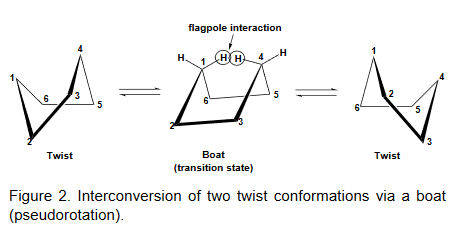

残念ながらすべてをスクリプトでは処理できなかったのでpymolを見ながら手で原子を入れ替えていった。cyclohexane.twistboatL.xtb.xyz および cyclohexane.twistboatR.xtb.xyzは、https://github.com/nakatamaho/quantumchemistry_notebook/tree/master/cyclohexane から入手してほしい。

In [18]:
!cp cyclohexane.twistboat.xtb.xyz cyclohexane.twistboatR.xtb.xyz
!python3 inverse_y.py cyclohexane.twistboatR.xtb.xyz > cyclohexane.twistboatL.xtb.xyz
!calculate_rmsd -e -p cyclohexane.twistboatR.xtb.xyz cyclohexane.twistboatL.xtb.xyz > l ; mv l cyclohexane.twistboatL.xtb.xyz
!cp cyclohexane.twistboatL_ok.xtb.xyz cyclohexane.twistboatL.xtb.xyz
!md5sum cyclohexane.twistboatL.xtb.xyz
!cp cyclohexane.twistboatR_ok.xtb.xyz cyclohexane.twistboatR.xtb.xyz
!md5sum cyclohexane.twistboatR.xtb.xyz
!calculate_rmsd -p cyclohexane.twistboatL.xtb.xyz cyclohexane.twistboatR.xtb.xyz > l ; mv l cyclohexane.twistboatR.xtb.xyz

3a05a02f60a690e8ee93494bfa0742bd  cyclohexane.twistboatL.xtb.xyz
4a7525762ec53fe01f074673dd2b7f7c  cyclohexane.twistboatR.xtb.xyz


In [19]:
!rm -f ./scartch/initial0000.xyz
!cat cyclohexane.twistboatR.xtb.xyz cyclohexane.twistboatL.xtb.xyz > ./scratch/initial0000.xyz
!cat ./scratch/initial0000.xyz
!sed -i 's/^NNODES.*$/NNODES      25/' inpfileq
!cat inpfileq

18
cyclohexane.twistboatR.xtb.xyz - modified
C       0.70850546      1.33992685     -0.00026818
C      -0.75991726      1.13899099     -0.39521265
C      -1.36902641     -0.01340914      0.39529628
C      -0.70846108     -1.33997219     -0.00025240
C       0.75993354     -1.13891877     -0.39512590
C       1.36899956      0.01342832      0.39553705
H       2.44444954      0.06794139      0.21683669
H       1.22388782     -0.17552712      1.46089488
H       1.32035366     -2.05828419     -0.21589170
H       0.83491009     -0.91282929     -1.46048383
H      -1.24706231     -1.78651508     -0.83847542
H      -0.77449228     -2.03699678      0.83757389
H      -1.22414344      0.17565549      1.46065988
H      -2.44443255     -0.06792581      0.21639520
H      -0.83502911      0.91304028     -1.46057211
H      -1.32026432      2.05836349     -0.21583320
H       0.77472949      2.03709464      0.83742022
H       1.24720656      1.78626113     -0.83857239
18
cyclohexane.twistboatL.xtb.xyz - m

gsmで中間体を求めると一つ負の固有値が求まったので正しいと思われる。計算時間は5-10分程度必要であった。

In [20]:
!/usr/bin/time ./gsm.orca

 Number of QC processors: 1 
***** Starting Initialization *****
 runend 1
  -structure filename from input: scratch/initial0000.xyz 
Initializing Tolerances and Parameters... 
  -Opening inpfileq 
  -reading file... 
  -using GSM 
  -RESTART: 0
  -MAX_OPT_ITERS: 200
  -STEP_OPT_ITERS: 30
  -CONV_TOL = 0.0005
  -ADD_NODE_TOL = 0.1
  -SCALING = 1
  -SSM_DQMAX: 0.8
  -SSM_DQMIN: 0.2
  -GROWTH_DIRECTION = 0
  -INT_THRESH: 2
  -SSM_MIN_SPACING: 5
  -BOND_FRAGMENTS = 1
  -INITIAL_OPT: 0
  -FINAL_OPT: 150
  -PRODUCT_LIMIT: 100
  -TS_FINAL_TYPE: 0
  -NNODES = 25
 Done reading inpfileq 

 reading isomers 
 couldn't find ISOMERS file: scratch/ISOMERS0000 
Reading and initializing string coordinates 
  -Opening structure file 
  -reading file... 
  -The number of atoms is: 18
  -Reading the atomic names...  -Reading coordinates...Opening xyz file 
Finished reading information from structure file

****************************************
****************************************
****** Starting IC


 ic1.nbonds: 18 ic2.nbonds: 18 
 saving bond union: 18  saving angle union: 36  saving torsion union: 54  total number of coordinates: 108 



 ---- Now preparing gradients ---- 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
 ---- Done preparing gradients ---- 


 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.001 ss: 0.004 (DMAX: 0.100) predE: -0.00  E(M): 0.05 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.001 ss:

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.001 ss: 0.003 (DMAX: 0.100) predE: -0.00  E(M): 0.05 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.007 (DMAX: 0.100) predE: -0.01  E(M): 0.16 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.010 (DMAX: 0.100) predE: -0.01  E(M): 0.31 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.012 (DMAX: 0.100) predE: -0.02  E(M): 0.49 gRMS: 0.0004 * 
 


 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal term


 growing iter: 10 
 adding node: 10 between 9 15 
 iR,iP: 9 15 iN: 10  dqmag: 1.00 dq0[constraint]: -0.20 
 initial Hint ev: 0.035 0.036 0.038 0.052
 adding node: 14 between 15 10 
 iR,iP: 15 10 iN: 14  dqmag: 1.00 dq0[constraint]: -0.25 
 initial Hint ev: 0.035 0.036 0.038 0.052
 rpart:  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00 0.00 0.00 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00
 spacings (end ic_reparam, steps: 4):  0.51 0.51 0.51 0.51 0.50 0.50 0.50 0.50 0.50 0.51 0.96 0.00 0.00 0.00 0.96 0.51 0.51 0.51 0.54 0.50 0.50 0.51 0.51 0.51 0.51  disprms: 0.041 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Not

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Q0Q2Q4Q6Wr(100.00000/-1)Q0Wr(100.00000/-1)Q0Q3Wr(100.00000/-1)Q0Q4Q6Wr(100.00000/-1)Q0Wr(100.00000/-1)Q0Wr(100.00000/-1)Q0Wr(100.00000/-1)Q0Wr(100.00000/-1)Q0Wr(100.00000/-1)Q0Q2Wr(100.00000/-1)Q0Wr(100.00000/-1)Q0Wr(100.00000/-1)Q0Q4Wr(100.00000/-1)Q0Q4Wr(100.00000/-1)Q0Q4Wr(100.00000/-1)Q0Wr(100.00000/-1)Q0Wr(100.00000/-1)Q0Q4Wr(100.00000/-1)Q0Wr(100.00000/-1)Q0Q3Wr(100.00000/-1)Q0Wr(100.00000/-1)Q0Q2Wr(100.00000/-1)Q0Wr(100.00000/-1)Q0Wr(100.00000/-1)Q0Q3Wr(15.69581/1)Q0Q2Q7Wr(82.39441/1)Q0Wr(100.00000/-1)Q0Wr(2.53856/1)Q0Q5Wr(1.3278

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floatin

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG I

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  t/ol: 0 (0.94) ss: 0.003 (0.100) predE: -0.00  Hint ev: 0.035 0.036 E(M): 0.04 gRMS: 0.0001 * 
 
 Opt step:  1  t/ol: 0 (0.94) ss: 0.007 (0.100) predE: -0.00  Hint ev: 0.035 0.036 E(M): 0.13 gRMS: 0.0002 * 
 
 Opt step:  1  t/ol: 0 (0.94) ss: 0.009 (0.100) predE: -0.01  Hint ev: 0.035 0.036 E(M): 0.26 gRMS: 0.0002 * 
 
 Opt step:  1  t/ol: 0 (0.96) ss: 0.008 (0.030) predE: -0.01  Hint ev: 0.035 0.036 E(M): 0.43 gRMS: 0.0003 * 
 
 Opt step:  1  t/ol: 0 (0.98) ss: 0.009 (0.020) predE: -0.01  Hint ev: 0.035 0.036 E(M): 0.60 gRMS: 0.0003 * 
 
 Opt step:  1  t/ol: 0 (0.98) ss: 0.012 (0.100) predE: -0.01  Hint ev: 0.035 0.036 E(M): 0.74 gRMS: 0.0003 * 
 
 Opt step:  1  t/ol: 0 (0.98) ss: 0.012 (0.100) predE: -0.01  Hint ev: 0.03

In [21]:
!cp stringfile.xyz0000 cyclohexane.tbL2tbR.xtb.xyz

In [22]:
view = JsmolView()
display(view)
view.load('cyclohexane.tbL2tbR.xtb.xyz', inline=False)
view.script('anim mode palindrome 2 2 ; anim on')

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [23]:
!cp scratch/tsq0000.xyz cyclohexane.boat.xtb.xyz

In [24]:
view = JsmolView.from_file("cyclohexane.boat.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

うまくボート型が作れた。

まとめ: イス型、ひずみボート型、半イス型、ボート型

In [25]:
view = JsmolView.from_file("cyclohexane.chair.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [26]:
view = JsmolView.from_file("cyclohexane.halfchair.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [27]:
view = JsmolView.from_file("cyclohexane.twistboat.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [28]:
view = JsmolView.from_file("cyclohexane.boat.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

実際の反応座標は二軸持ってくるのがわかりやすい。以下はA Three-Dimensional Energy Surface for the Conformational Inversion of CyclohexaneのFig.4である。ボート型を経る反転経路をとると60度捩じれることがわかる。

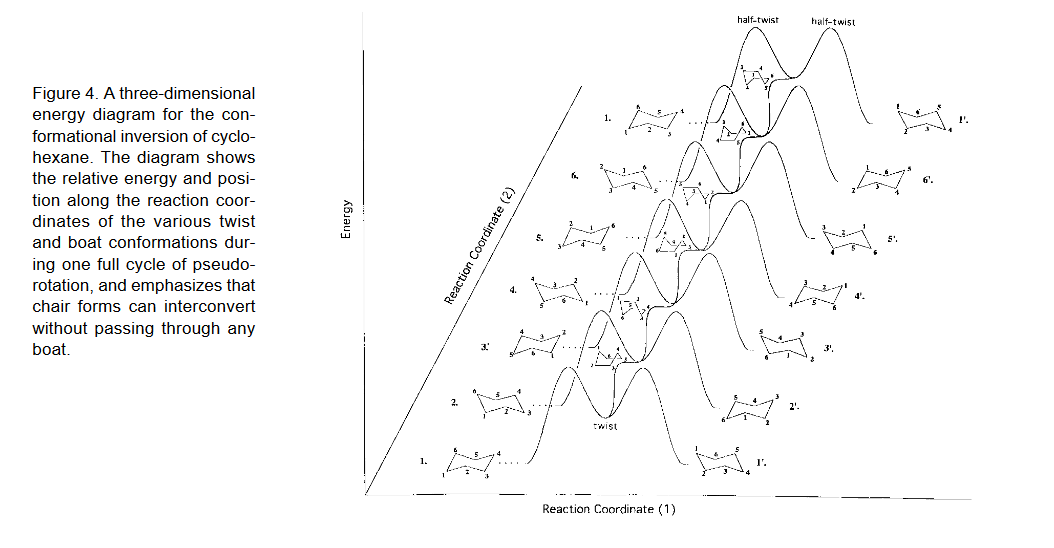

反応座標におけるエネルギーをプロットしてみよう。まずは、イス型からひずみボート型まで。
GMSの計算後、xyzファイルたちのコメントにkcal/mol単位で相対エネルギーが入っているため、それを利用する。

In [29]:
!rm -f cyclohexane.chair2twistboat.energy.csv a.????.xyz
!python3 splitxyz.py cyclohexane.chair2twistboat.xtb.xyz a
!echo "coordinate,energy" > cyclohexane.chair2twistboat.energy.csv
!files=`ls a.????.xyz` ; for _file in $files; do B=`sed -n 2p $_file`; echo ", $B" ; done | cat -n | sed s/"\s"//g >> cyclohexane.chair2twistboat.energy.csv
!rm a.????.xyz
!cat cyclohexane.chair2twistboat.energy.csv

rm: cannot remove 'a.????.xyz': No such file or directory
output: a.0000.xyz 
output: a.0001.xyz 
output: a.0002.xyz 
output: a.0003.xyz 
output: a.0004.xyz 
output: a.0005.xyz 
output: a.0006.xyz 
output: a.0007.xyz 
output: a.0008.xyz 
output: a.0009.xyz 
output: a.0010.xyz 
output: a.0011.xyz 
output: a.0012.xyz 
output: a.0013.xyz 
output: a.0014.xyz 
coordinate,energy
1,0.000000
2,0.642328
3,2.248929
4,4.432258
5,6.699221
6,8.821163
7,10.530216
8,11.499785
9,11.551673
10,10.753468
11,9.534894
12,8.041387
13,6.730534
14,5.825202
15,5.385789


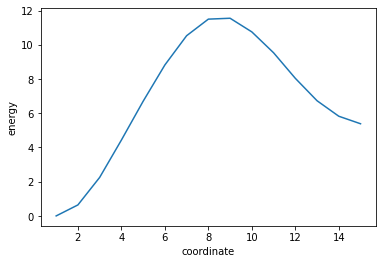

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("cyclohexane.chair2twistboat.energy.csv")
plt.plot(data['coordinate'], data['energy'])
plt.xlabel('coordinate')
plt.ylabel('energy')
plt.show()

上の図は左がイス型のシクロヘキサン、右が歪みボート型。もっともエネルギーが高いものが半イス型となっている。
遷移状態は、イス型と比べて11.5kcal/mol(=48.1kJ/mol)エネルギーが高い。ほぼwikipediaの値と一致した。
次に、ひずみボート型-ボート型のエネルギー差を求める。

In [31]:
!rm -f cyclohexane.tb2tb.energy.csv a.????.xyz
!python3 splitxyz.py cyclohexane.tbL2tbR.xtb.xyz a
!echo "coordinate,energy" > cyclohexane.tb2tb.energy.csv
!files=`ls a.????.xyz` ; for _file in $files; do B=`sed -n 2p $_file`; echo ", $B" ; done | cat -n | sed s/"\s"//g >> cyclohexane.tb2tb.energy.csv
!rm a.????.xyz
!cat cyclohexane.tb2tb.energy.csv

output: a.0000.xyz 
output: a.0001.xyz 
output: a.0002.xyz 
output: a.0003.xyz 
output: a.0004.xyz 
output: a.0005.xyz 
output: a.0006.xyz 
output: a.0007.xyz 
output: a.0008.xyz 
output: a.0009.xyz 
output: a.0010.xyz 
output: a.0011.xyz 
output: a.0012.xyz 
output: a.0013.xyz 
output: a.0014.xyz 
output: a.0015.xyz 
output: a.0016.xyz 
output: a.0017.xyz 
output: a.0018.xyz 
output: a.0019.xyz 
output: a.0020.xyz 
output: a.0021.xyz 
output: a.0022.xyz 
output: a.0023.xyz 
output: a.0024.xyz 
coordinate,energy
1,0.000000
2,0.036847
3,0.129070
4,0.262069
5,0.427346
6,0.596577
7,0.741749
8,0.888797
9,1.022430
10,1.136873
11,1.237461
12,1.291401
13,1.311663
14,1.292198
15,1.238735
16,1.139220
17,1.004433
18,0.862925
19,0.709031
20,0.572067
21,0.417915
22,0.262784
23,0.130457
24,0.037612
25,0.000006


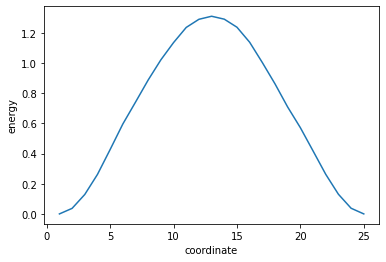

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("cyclohexane.tb2tb.energy.csv")
plt.xlabel('coordinate')
plt.ylabel('energy')
plt.plot(data['coordinate'], data['energy'])
plt.show()

左が歪みボート型、右も歪みボート型である。エネルギー障壁は以上のように1.2kcal/mol(=5kJ/mol)これもほぼwikipediaの値と一致した。

おまけ
失敗例。シクロヘキサンの歪みボート型-歪みボート型の遷移状態を求めようとして、とりあえず鏡像体を作り、二つの構造の重ね合わせを見ながら水素を入れ替える。つまり、シクロヘキサンのエカトリアル位とアキシアル位の水素が反転するのだろう、と仮定するわけだ。しかしこれだと失敗する。なぜなら、この場合正六角形の遷移状態をへるが、エネルギー障壁が20kcal/molと高すぎるためである。従ってそのような遷移はほとんど起きないと考えられる。

In [33]:
!rm -f ./scartch/initial0000.xyz
!calculate_rmsd -p cyclohexane.twistboatRng.xtb.xyz cyclohexane.twistboatLng.xtb.xyz > l ; mv l cyclohexane.twistboatLng.xtb.xyz
!cat cyclohexane.twistboatRng.xtb.xyz cyclohexane.twistboatLng.xtb.xyz > ./scratch/initial0000.xyz
!cat ./scratch/initial0000.xyz
!cat inpfileq

18
 
C         -0.6515298075       -1.2041425126        0.3952488082
C          0.6518632526       -1.2038873888       -0.3954005117
C          1.5157982497        0.0001190629        0.0001901396
C          0.6516255969        1.2041637605        0.3950972106
C         -0.6520049831        1.2039521182       -0.3952123095
C         -1.5157691903       -0.0002377042        0.0001087993
H         -2.1622289796       -0.2678434049       -0.8380688910
H         -2.1628193310        0.2668800435        0.8379751095
H         -0.4173462929        1.1646974597       -1.4607123495
H          1.2023143147        2.1293300919        0.2154268515
H          0.4170588669        1.1649289689        1.4605697006
H         -1.2030141752        2.1289829867       -0.2157585987
H          2.1623338203       -0.2673427064        0.8384147194
H          2.1628274492        0.2676194252       -0.8376713701
H         -1.2023432353       -2.1293676237        0.2161707973
H          0.4170763926       -1.16

In [34]:
!/usr/bin/time ./gsm.orca

 Number of QC processors: 1 
***** Starting Initialization *****
 runend 1
  -structure filename from input: scratch/initial0000.xyz 
Initializing Tolerances and Parameters... 
  -Opening inpfileq 
  -reading file... 
  -using GSM 
  -RESTART: 0
  -MAX_OPT_ITERS: 200
  -STEP_OPT_ITERS: 30
  -CONV_TOL = 0.0005
  -ADD_NODE_TOL = 0.1
  -SCALING = 1
  -SSM_DQMAX: 0.8
  -SSM_DQMIN: 0.2
  -GROWTH_DIRECTION = 0
  -INT_THRESH: 2
  -SSM_MIN_SPACING: 5
  -BOND_FRAGMENTS = 1
  -INITIAL_OPT: 0
  -FINAL_OPT: 150
  -PRODUCT_LIMIT: 100
  -TS_FINAL_TYPE: 0
  -NNODES = 25
 Done reading inpfileq 

 reading isomers 
 couldn't find ISOMERS file: scratch/ISOMERS0000 
Reading and initializing string coordinates 
  -Opening structure file 
  -reading file... 
  -The number of atoms is: 18
  -Reading the atomic names...  -Reading coordinates...Opening xyz file 
Finished reading information from structure file

****************************************
****************************************
****** Starting IC


 ic1.nbonds: 18 ic2.nbonds: 18 
 saving bond union: 18  saving angle union: 36  saving torsion union: 54  total number of coordinates: 108 



 ---- Now preparing gradients ---- 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
 ---- Done preparing gradients ---- 



 growing iter: 4 
 adding node: 4 between 3 21 
 iR,iP: 3 21 iN: 4  dqmag: 0.99 dq0[constraint]: -0.06 
 initial Hint ev: 0.035 0.036 0.037 0.051
 adding node: 20 between 21 4 
 iR,iP: 21 4 iN: 20  dqmag: 0.99 dq0[constraint]: -0.06 
 initial Hint ev: 0.035 0.036 0.037 0.051
 rpart:  0.12 0.12 0.12 0.12 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.12 0.12 0.12 0.12 0.00
 spacings (end ic_reparam, steps: 4):  0.72 0.68 0.68 0.67 2.86 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.86 0.67 0.68 0.68 0.72  disprms: 0.048 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: Th

 initial Hint ev: 0.035 0.035 0.036 0.051
 rpart:  0.08 0.08 0.08 0.08 0.08 0.08 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.08 0.08 0.08 0.08 0.08 0.08 0.00
 spacings (end ic_reparam, steps: 4):  0.72 0.69 0.69 0.68 0.68 0.68 2.51 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.51 0.68 0.68 0.68 0.69 0.69 0.72  disprms: 0.044 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination 


 growing iter: 8 
 adding node: 8 between 7 17 
 iR,iP: 7 17 iN: 8  dqmag: 1.00 dq0[constraint]: -0.11 
 initial Hint ev: 0.035 0.035 0.036 0.050
 adding node: 16 between 17 8 
 iR,iP: 17 8 iN: 16  dqmag: 1.00 dq0[constraint]: -0.12 
 initial Hint ev: 0.035 0.035 0.036 0.050
 rpart:  0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00
 spacings (end ic_reparam, steps: 4):  0.72 0.69 0.69 0.69 0.69 0.68 0.68 0.68 2.11 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.11 0.68 0.68 0.68 0.69 0.69 0.69 0.69 0.72  disprms: 0.042 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: Th

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.003 ss: 0.004 (DMAX: 0.100) predE: -0.00  E(M): 0.55 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.005 ss: 0.007 (DMAX: 0.100) predE: -0.00  E(M): 1.86 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.007 ss: 0.010 (DMAX: 0.100) predE: -0.01  E(M): 3.73 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.008 ss: 0.012 (DMAX: 0.100) predE: -0.01  E(M): 6.00 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.009 ss: 0.015 (DMAX: 0.100) predE: -0.02  E(M): 8.49 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.009 ss: 0.


 growing iter: 11 
 adding node: 11 between 10 14 
 iR,iP: 10 14 iN: 11  dqmag: 1.00 dq0[constraint]: -0.33 
 initial Hint ev: 0.035 0.035 0.035 0.049
 adding node: 13 between 14 11 
 iR,iP: 14 11 iN: 13  dqmag: 1.00 dq0[constraint]: -0.50 
 initial Hint ev: 0.035 0.035 0.035 0.049
 rpart:  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00
 spacings (end ic_reparam, steps: 4):  0.72 0.69 0.69 0.69 0.69 0.69 0.69 0.69 0.69 0.68 0.68 1.25 0.00 1.25 0.70 0.68 0.69 0.69 0.69 0.69 0.69 0.69 0.69 0.69 0.72  disprms: 0.040 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
N

 disp[1]: -0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.01 disp[5]: 0.01 disp[6]: 0.01 disp[7]: 0.01 disp[8]: 0.01 disp[9]: 0.01 disp[10]: 0.01 disp[11]: 0.01 disp[12]: 0.01 disp[13]: -0.01 disp[14]: -0.01 disp[15]: -0.01 disp[16]: -0.01 disp[17]: -0.01 disp[18]: -0.01 disp[19]: -0.01 disp[20]: -0.01 disp[21]: -0.00 disp[22]: -0.00 disp[23]: -0.00
 disp[1]: -0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.00 disp[6]: 0.00 disp[7]: 0.00 disp[8]: 0.00 disp[9]: 0.01 disp[10]: 0.01 disp[11]: 0.01 disp[12]: 0.01 disp[13]: -0.01 disp[14]: -0.01 disp[15]: -0.01 disp[16]: -0.00 disp[17]: -0.00 disp[18]: -0.00 disp[19]: -0.00 disp[20]: -0.00 disp[21]: -0.00 disp[22]: -0.00 disp[23]: -0.00
 spacings (end ic_reparam, steps: 25):  0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.72 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71  disprms: 0.020 


 Starting String opt 
 V_profile:  0.0 0.5 1.9 3.7 6.0 8.5 11.0 13.5 15.8 17.8 19.5 20.6 0.0 20.6 19.5 17.8 15.9 13.6 11.1 

 V_profile: 0.0 0.5 1.9 3.9 6.3 9.0 11.7 14.3 16.6 18.6 20.1 21.0 21.3 21.0 20.1 18.6 16.6 14.3 11.7 9.0 6.3 3.9 1.9 0.5 0.0
 TSn: 12 rpart:  0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.00 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08
 disp[1]: -0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.00 disp[6]: 0.00 disp[7]: 0.00 disp[8]: 0.00 disp[9]: 0.00 disp[10]: 0.00 disp[11]: 0.00 disp[12]: 0.00 disp[13]: -0.01 disp[14]: -0.01 disp[15]: -0.01 disp[16]: -0.01 disp[17]: -0.01 disp[18]: -0.01 disp[19]: -0.01 disp[20]: -0.01 disp[21]: -0.00 disp[22]: -0.00 disp[23]: -0.00
 disp[1]: -0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.00 disp[6]: 0.00 disp[7]: 0.00 disp[8]: 0.00 disp[9]: 0.00 disp[10]: 0.00 disp[11]: 0.00 disp[12]: 0.00 disp[13]: -0.01 disp[14]: -0.01 disp[15]: -0.01 disp[16]: -0.00 disp[17]: -0.00 disp[18]: -0.00 disp[19]: -0.00 disp[20]: -0.00 disp[21]: -0.00 disp[22]: -0.00 disp[23]: -0.00
 spacings (end ic_reparam, steps: 5):  0

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point except


 mag/DTHRESH: 0.001099 0.000050 lamb/lambp: -0.003 -0.003 
 vector 0 converged 
 mag/DTHRESH: 0.000135 0.000050 lamb/lambp: -0.003 -0.003 
 vector 1 converged 
 mag/DTHRESH: 0.000062 0.000050 lamb/lambp: -0.003 -0.003 
 vector 2 converged 

 Davidson iteration 3 

 mag/DTHRESH: 0.001099 0.000050 lamb/lambp: -0.003 -0.003 
 vector 0 converged 
 mag/DTHRESH: 0.000135 0.000050 lamb/lambp: -0.003 -0.003 
 vector 1 converged 
 mag/DTHRESH: 0.000062 0.000050 lamb/lambp: -0.003 -0.003 
 vector 2 converged 
 Davidson converged 

 now saving vibrations to stringfile.xyz0000fr 
 Hessian eigenvalues: -0.003 -0.003 -0.003

 Updating Hint with new vectors 
 updating vector: 1 with curvature: -0.00346 
 updating vector: 2 with curvature: -0.00330 
 updating vector: 3 with curvature: -0.00283 

 Davidson required 12 gradients 

 found 3 negative eigenvalues 
 creating final string file  

 about to write tsq.xyz, tscontinue: 1 endearly: 0 
 check_for_reaction wts: 0 wint: 24 isrxn: 0 
 E of min node

In [35]:
!cp scratch/tsq0000.xyz cyclohexane.hex.xtb.xyz

In [36]:
view = JsmolView.from_file("cyclohexane.hex.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

これは正六角形をもった新しい遷移状態ではないか、とも思えるが、エネルギー障壁は21.3kcal/molもあるため、この経路はほとんど起こらないだろう。

In [37]:
!cp stringfile.xyz0000 cyclohexane.tb2hex2tb.xtb.xyz

まずは歪みボート型から六角型を経て歪みボート型に移る経路を見てみる。

In [38]:
!rm -f a.????.xyz cyclohexane.tb2hex2tb.energy.csv
!python3 splitxyz.py cyclohexane.tb2hex2tb.xtb.xyz a
!echo "coordinate,energy" > cyclohexane.tb2hex2tb.energy.csv
!files=`ls a.????.xyz` ; for _file in $files; do B=`sed -n 2p $_file`; echo ", $B" ; done | cat -n | sed s/"\s"//g >> cyclohexane.tb2hex2tb.energy.csv
!cat cyclohexane.tb2hex2tb.energy.csv

output: a.0000.xyz 
output: a.0001.xyz 
output: a.0002.xyz 
output: a.0003.xyz 
output: a.0004.xyz 
output: a.0005.xyz 
output: a.0006.xyz 
output: a.0007.xyz 
output: a.0008.xyz 
output: a.0009.xyz 
output: a.0010.xyz 
output: a.0011.xyz 
output: a.0012.xyz 
output: a.0013.xyz 
output: a.0014.xyz 
output: a.0015.xyz 
output: a.0016.xyz 
output: a.0017.xyz 
output: a.0018.xyz 
output: a.0019.xyz 
output: a.0020.xyz 
output: a.0021.xyz 
output: a.0022.xyz 
output: a.0023.xyz 
output: a.0024.xyz 
rm: cannot remove 'cyclohexane.tb2hex2tb.energy.csv': No such file or directory
coordinate,energy
1,0.000000
2,0.522199
3,1.898702
4,3.901695
5,6.319032
6,8.967609
7,11.667810
8,14.259379
9,16.597344
10,18.558789
11,20.035385
12,20.954829
13,21.288258
14,20.962723
15,20.048838
16,18.576240
17,16.616771
18,14.278951
19,11.685707
20,8.982826
21,6.330603
22,3.909294
23,1.902599
24,0.523837
25,0.000000


In [39]:
view = JsmolView()
display(view)
view.load('cyclohexane.tb2hex2tb.xtb.xyz', inline=False)
view.script('anim mode palindrome 2 2 ; anim on')

JsmolView(layout=Layout(align_self='stretch', height='400px'))

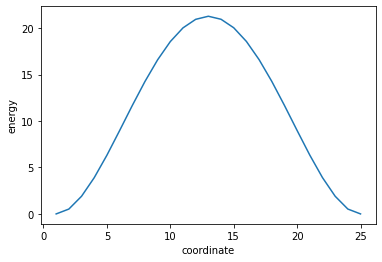

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("cyclohexane.tb2hex2tb.energy.csv")
plt.xlabel('coordinate')
plt.ylabel('energy')
plt.plot(data['coordinate'], data['energy'])
plt.show()

お疲れさまでした。以上